In [1]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
data = anndata.read_h5ad("sce.h5ad")

In [3]:
data

AnnData object with n_obs × n_vars = 139331 × 29452
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL'
    uns: 'X_name'
    obsm: 'pca.corrected', 'umap'

In [3]:
data.obsm["X_umap"] = data.obsm["umap"].loc[:, ("x", "y")].to_numpy()
data.obsm["X_pca"] = data.obsm["pca.corrected"].loc[:, ("PC1", "PC2")].to_numpy()

In [31]:
data.obsm["umap"].loc[:, ("x", "y")].to_numpy()

array([[-10.22754591,  -2.88168748],
       [ -6.62545842,   0.10896052],
       [         nan,          nan],
       ...,
       [  3.66432854,   3.71813924],
       [  8.26069918,   7.93545472],
       [ -2.1498457 ,  -6.35026825]])

In [33]:
data.obsm["X_umap"]

array([[-10.22754591,  -2.88168748],
       [ -6.62545842,   0.10896052],
       [         nan,          nan],
       ...,
       [  3.66432854,   3.71813924],
       [  8.26069918,   7.93545472],
       [ -2.1498457 ,  -6.35026825]])

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


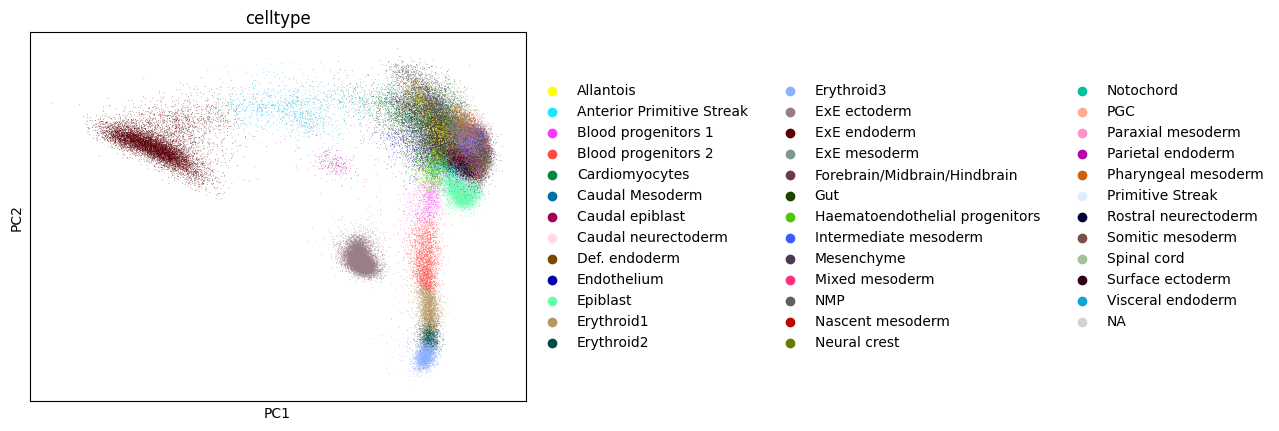

In [4]:
sc.pl.pca(data, color = "celltype")

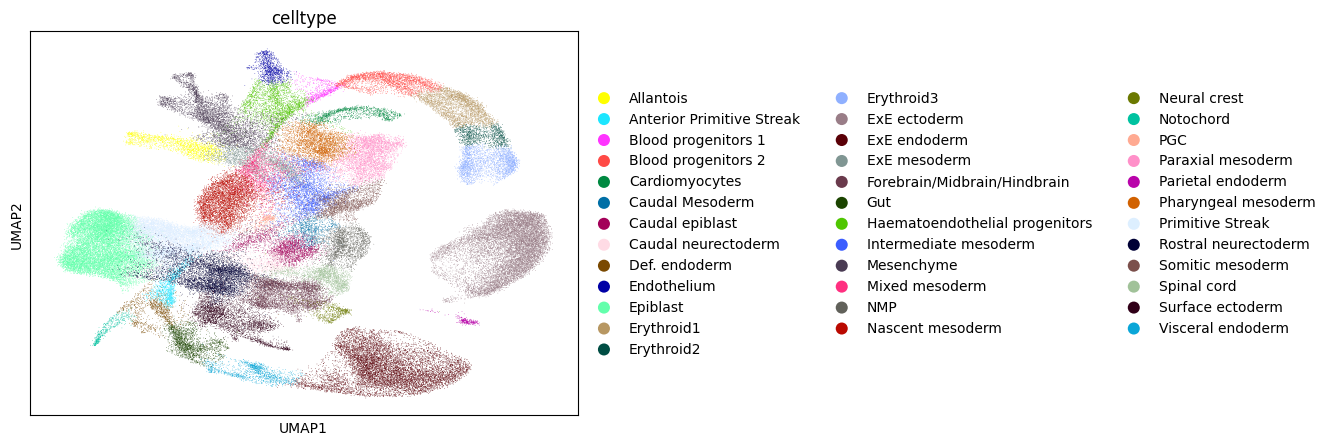

In [5]:
sc.pl.scatter(data, basis = "umap", color =  "celltype")

In [6]:
bloodlabels = [
    "Blood progenitors 1",
    "Blood progenitors 2",
    "Endothelium",
    "Erythroid1",
    "Erythroid2",
    "Erythroid3",
    "Haematoendothelial progenitors",
    "Mixed mesoderm"
]

In [7]:
blood = data[data.obs["celltype"].isin(bloodlabels), :]

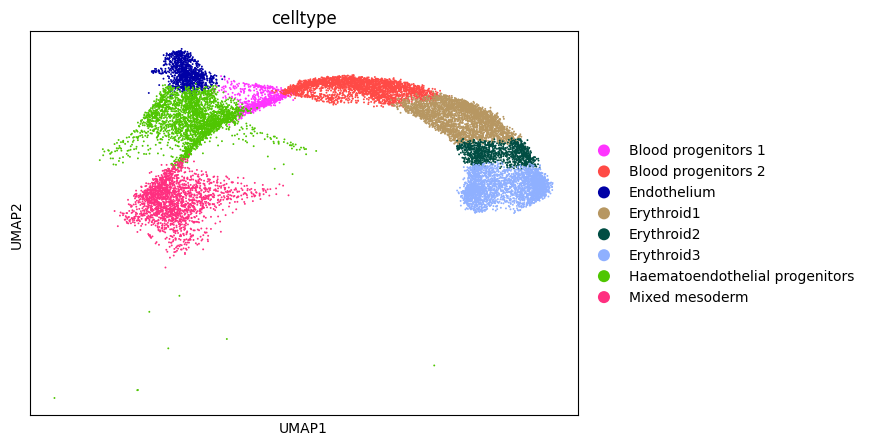

In [14]:
sc.pl.scatter(blood, basis = "umap", color = "celltype")

In [11]:
sc.pp.highly_variable_genes(blood, n_top_genes = 1000, flavor = "seurat_v3")

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:149: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


In [16]:
blood_hvg = blood[:, blood.var["highly_variable"]]

In [21]:
sc.pp.neighbors(blood_hvg, n_neighbors = 10, use_rep = "X_pca")

In [22]:
blood_hvg

AnnData object with n_obs × n_vars = 15875 × 1000
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg', 'neighbors', 'diffmap_evals'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca', 'X_diffmap'
    obsp: 'distances', 'connectivities'

In [23]:
sc.tl.diffmap(blood_hvg)

In [132]:
blood

AnnData object with n_obs × n_vars = 15875 × 29452
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca'

In [130]:
blood_hvg

AnnData object with n_obs × n_vars = 15875 × 1000
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg', 'neighbors', 'diffmap_evals', 'draw_graph'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca', 'X_diffmap', 'X_draw_graph_fr', 'X_draw_graph_fa'
    obsp: 'distances', 'connectivities'

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


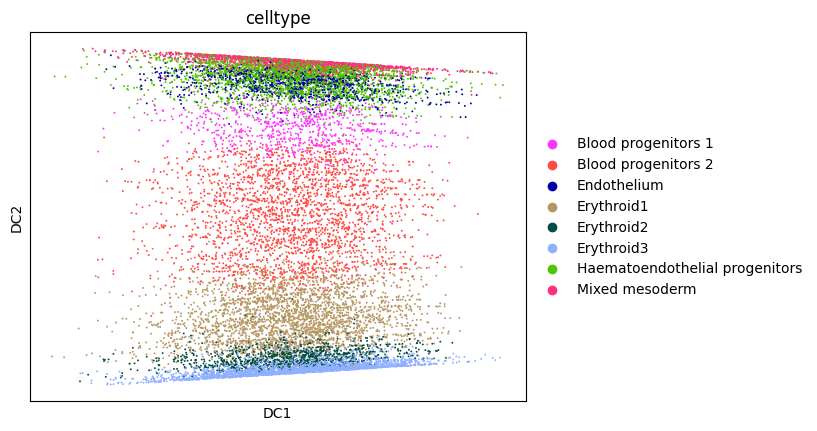

In [24]:
sc.pl.diffmap(blood_hvg, color = "celltype")

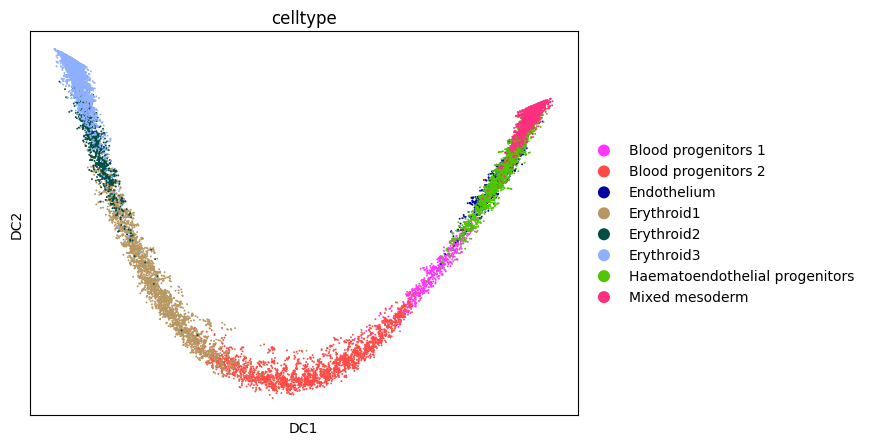

In [25]:
sc.pl.scatter(blood_hvg, basis = "diffmap", color = "celltype")

In [63]:
import seaborn as sns

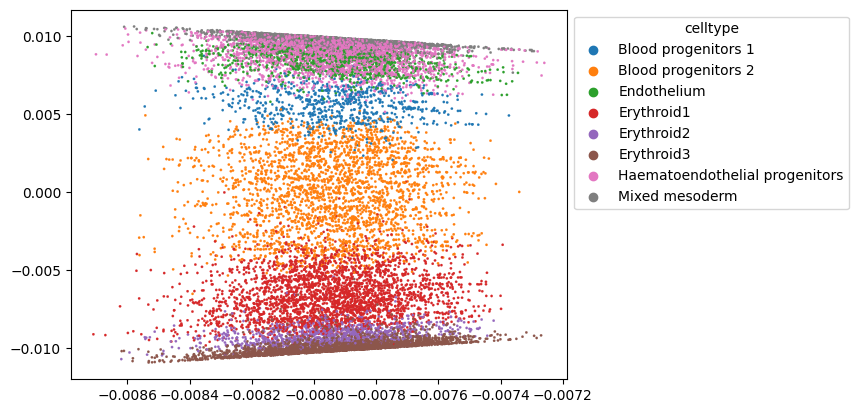

In [84]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 0], y = blood_hvg.obsm["X_diffmap"][:, 1], hue = blood_hvg.obs["celltype"], s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

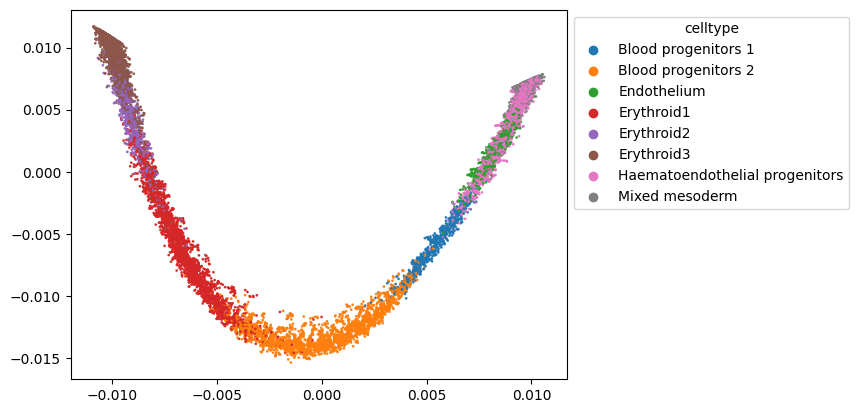

In [83]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 1], y = blood_hvg.obsm["X_diffmap"][:, 2], hue = blood_hvg.obs["celltype"], s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

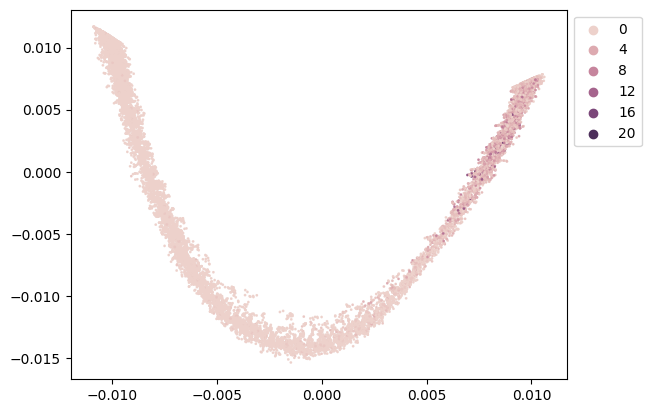

In [111]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 1], y = blood_hvg.obsm["X_diffmap"][:, 2], hue = blood_hvg.obs_vector("ENSMUSG00000062960"), s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [102]:
blood_hvg.var.loc["ENSMUSG00000062960", :]

ENSEMBL                 ENSMUSG00000062960
SYMBOL                                 Kdr
highly_variable                       True
highly_variable_rank                 187.0
means                                  NaN
variances                              NaN
variances_norm                    2.906269
Name: ENSMUSG00000062960, dtype: object

In [112]:
kdr_expr = blood_hvg.obs_vector("ENSMUSG00000062960")

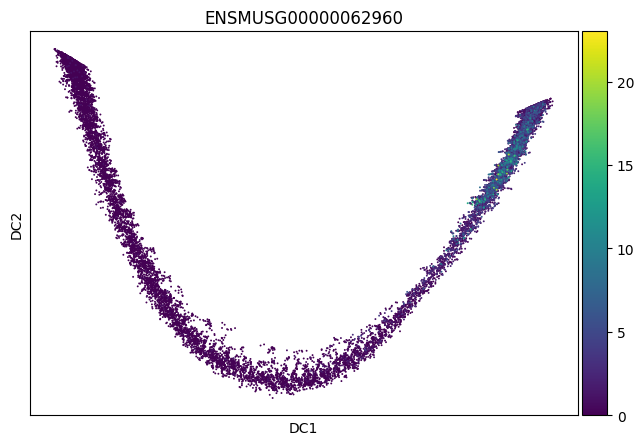

In [108]:
sc.pl.scatter(blood_hvg, basis = "diffmap", color = "ENSMUSG00000062960")

In [126]:
def get_gene_expr(dataset, name):
    gene = dataset.var[dataset.var.SYMBOL == name].index.values[0]
    return dataset.obs_vector(gene)

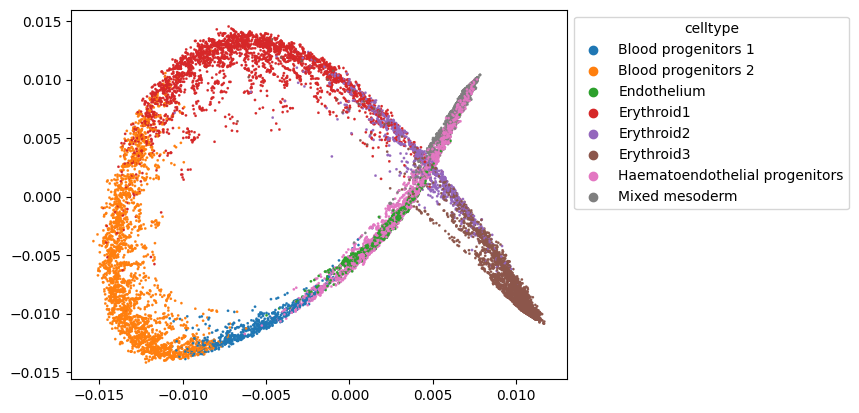

In [82]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 2], y = blood_hvg.obsm["X_diffmap"][:, 3], hue = blood_hvg.obs["celltype"], s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

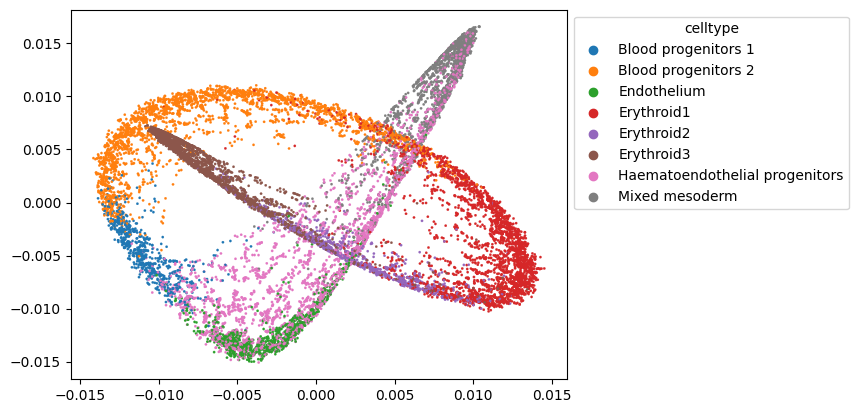

In [85]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 3], y = blood_hvg.obsm["X_diffmap"][:, 4], hue = blood_hvg.obs["celltype"], s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

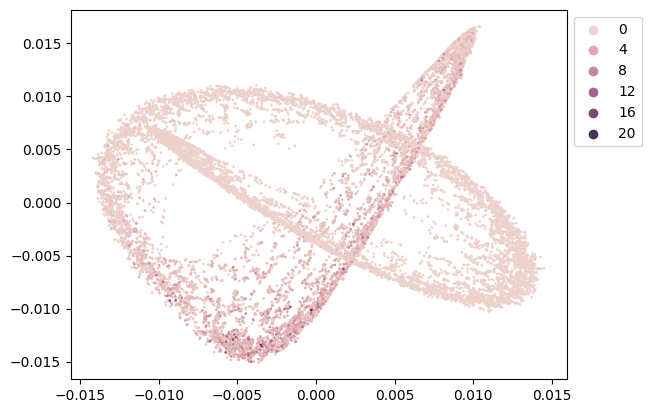

In [113]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 3], y = blood_hvg.obsm["X_diffmap"][:, 4], hue = kdr_expr, s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

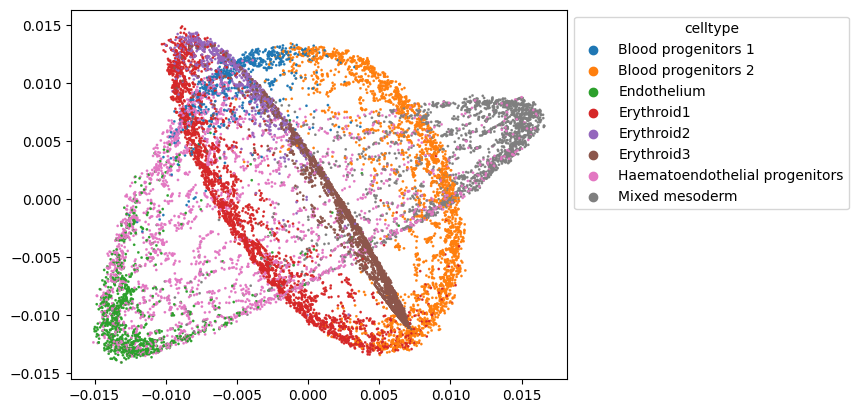

In [86]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_diffmap"][:, 4], y = blood_hvg.obsm["X_diffmap"][:, 5], hue = blood_hvg.obs["celltype"], s = 3, edgecolor = None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [61]:
sc.pl.scatter(blood_hvg, x = blood_hvg.obsm["X_diffmap"][:, 0], y = blood_hvg.obsm["X_diffmap"][:, 1], color = "celltype")

TypeError: unhashable type: 'numpy.ndarray'

In [30]:
blood_hvg

AnnData object with n_obs × n_vars = 15875 × 1000
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg', 'neighbors', 'diffmap_evals', 'draw_graph'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca', 'X_diffmap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [32]:
import fa2_modified as fa2

In [34]:
from fa2 import ForceAtlas2

ModuleNotFoundError: No module named 'fa2'

In [48]:
from scanpy._utils import NeighborsView

In [49]:
def _choose_graph(adata, obsp, neighbors_key):
    """Choose connectivities from neighbbors or another obsp column"""
    if obsp is not None and neighbors_key is not None:
        raise ValueError(
            "You can't specify both obsp, neighbors_key. " "Please select only one."
        )

    if obsp is not None:
        return adata.obsp[obsp]
    else:
        neighbors = NeighborsView(adata, neighbors_key)
        if "connectivities" not in neighbors:
            raise ValueError(
                "You need to run `pp.neighbors` first "
                "to compute a neighborhood graph."
            )
        return neighbors["connectivities"]

In [57]:
def draw_graph(
    adata,
    layout = "fa",
    *,
    init_pos: str | bool | None = None,
    root: int | None = None,
    random_state = 0,
    n_jobs: int | None = None,
    adjacency = None,
    key_added_ext: str | None = None,
    neighbors_key: str | None = None,
    obsp: str | None = None,
    copy: bool = False,
    **kwds,
):


    adata = adata.copy() if copy else adata
    if adjacency is None:
        adjacency = _choose_graph(adata, obsp, neighbors_key)
    # init coordinates
    if init_pos in adata.obsm.keys():
        init_coords = adata.obsm[init_pos]
    # elif init_pos == "paga" or init_pos:
    #     init_coords = get_init_pos_from_paga(
    #         adata,
    #         adjacency,
    #         random_state=random_state,
    #         neighbors_key=neighbors_key,
    #         obsp=obsp,
    #     )
    else:
        np.random.seed(random_state)
        init_coords = np.random.random((adjacency.shape[0], 2))
    # see whether fa2 is installed
    if layout == "fa":
        try:
            from fa2_modified import ForceAtlas2
        except ImportError:
            logg.warning(
                "Package 'fa2' is not installed, falling back to layout 'fr'."
                "To use the faster and better ForceAtlas2 layout, "
                "install package 'fa2' (`pip install fa2`)."
            )
            layout = "fr"
    # actual drawing
    if layout == "fa":
        forceatlas2 = ForceAtlas2(
            # Behavior alternatives
            outboundAttractionDistribution=False,  # Dissuade hubs
            linLogMode=False,  # NOT IMPLEMENTED
            adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
            edgeWeightInfluence=1.0,
            # Performance
            jitterTolerance=1.0,  # Tolerance
            barnesHutOptimize=True,
            barnesHutTheta=1.2,
            multiThreaded=False,  # NOT IMPLEMENTED
            # Tuning
            scalingRatio=2.0,
            strongGravityMode=False,
            gravity=1.0,
            # Log
            verbose=False,
        )
        if "maxiter" in kwds:
            iterations = kwds["maxiter"]
        elif "iterations" in kwds:
            iterations = kwds["iterations"]
        else:
            iterations = 500
        positions = forceatlas2.forceatlas2(
            adjacency, pos=init_coords, iterations=iterations
        )
        positions = np.array(positions)
    # else:
    #     # igraph doesn't use numpy seed
    #     random.seed(random_state)

    #     g = _utils.get_igraph_from_adjacency(adjacency)
    #     if layout in {"fr", "drl", "kk", "grid_fr"}:
    #         ig_layout = g.layout(layout, seed=init_coords.tolist(), **kwds)
    #     elif "rt" in layout:
    #         if root is not None:
    #             root = [root]
    #         ig_layout = g.layout(layout, root=root, **kwds)
    #     else:
    #         ig_layout = g.layout(layout, **kwds)
    #     positions = np.array(ig_layout.coords)
    adata.uns["draw_graph"] = {}
    adata.uns["draw_graph"]["params"] = dict(layout=layout, random_state=random_state)
    key_added = f"X_draw_graph_{key_added_ext or layout}"
    adata.obsm[key_added] = positions
    # print(
    #     "    finished",
    #     deep=f"added\n    {key_added!r}, graph_drawing coordinates (adata.obsm)",
    # )
    return adata if copy else None

In [58]:
draw_graph(blood_hvg)

In [59]:
blood_hvg

AnnData object with n_obs × n_vars = 15875 × 1000
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg', 'neighbors', 'diffmap_evals', 'draw_graph'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca', 'X_diffmap', 'X_draw_graph_fr', 'X_draw_graph_fa'
    obsp: 'distances', 'connectivities'

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


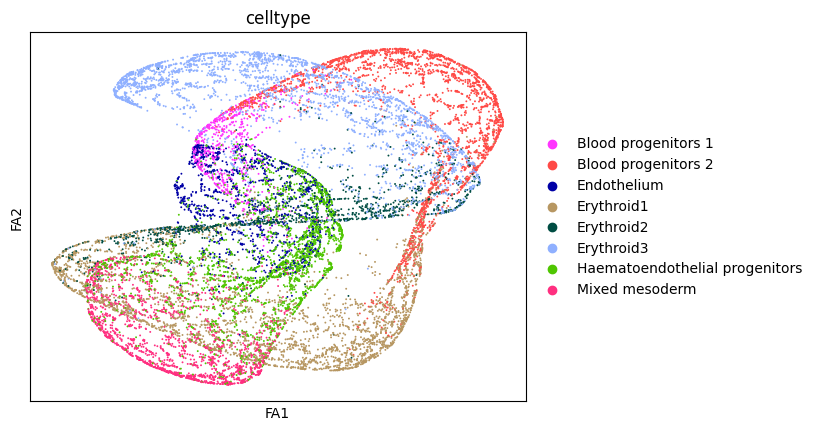

In [60]:
sc.pl.draw_graph(blood_hvg, color = "celltype")

In [115]:
blood_hvg

AnnData object with n_obs × n_vars = 15875 × 1000
    obs: 'cell', 'barcode', 'sample', 'pool', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'sizeFactor'
    var: 'ENSEMBL', 'SYMBOL', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'X_name', 'celltype_colors', 'hvg', 'neighbors', 'diffmap_evals', 'draw_graph'
    obsm: 'pca.corrected', 'umap', 'X_umap', 'X_pca', 'X_diffmap', 'X_draw_graph_fr', 'X_draw_graph_fa'
    obsp: 'distances', 'connectivities'

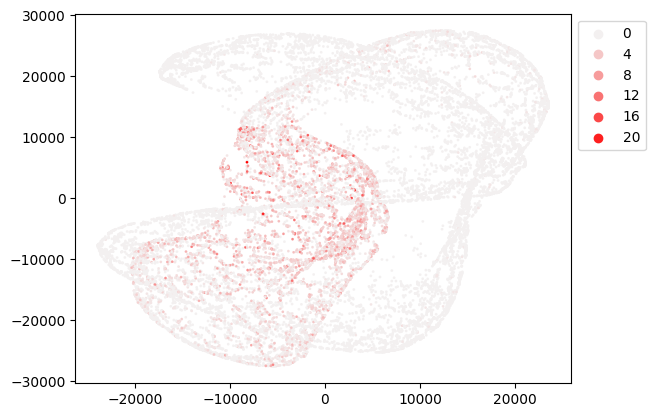

In [121]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_draw_graph_fa"][:, 0], y = blood_hvg.obsm["X_draw_graph_fa"][:, 1], hue = kdr_expr, s = 3, edgecolor = None, palette = "light:r")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

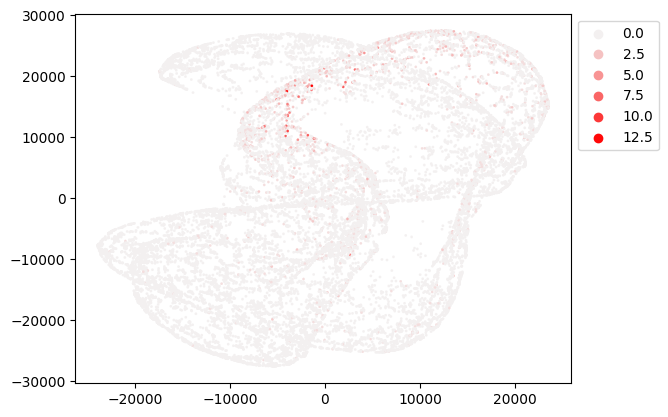

In [128]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_draw_graph_fa"][:, 0], y = blood_hvg.obsm["X_draw_graph_fa"][:, 1], hue = get_gene_expr(blood_hvg, "Spi1"), s = 3, edgecolor = None, palette = "light:r")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [129]:
ax = sns.scatterplot(x = blood_hvg.obsm["X_draw_graph_fa"][:, 0], y = blood_hvg.obsm["X_draw_graph_fa"][:, 1], hue = get_gene_expr(blood_hvg, "Itga2b"), s = 3, edgecolor = None, palette = "light:r")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

IndexError: index 0 is out of bounds for axis 0 with size 0

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


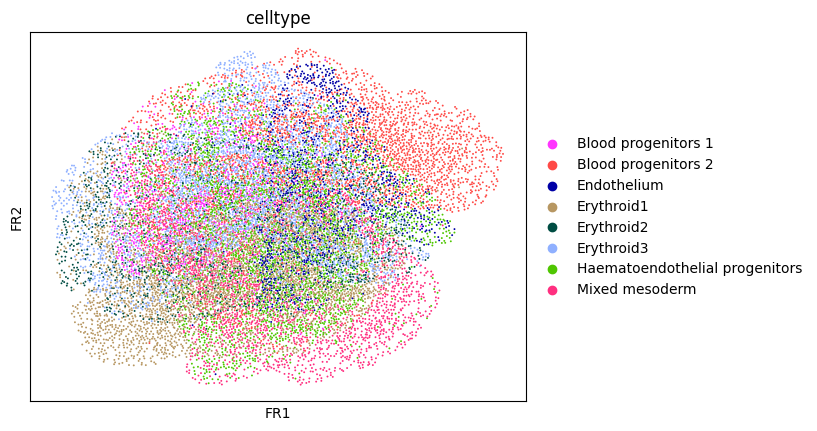

In [28]:
sc.pl.draw_graph(blood_hvg, color = "celltype")